<a href="https://colab.research.google.com/github/A-Burnhard/Iris-classification/blob/main/Iris(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#Loading or importing  wine dataset to notebook
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv("iris.data", names=cols)
iris_data.head()

**Preprocessing**

**Identifying missing values**

In [ ]:
# Identify missing values
missing_values = iris_data.isnull().sum()
print("Missing values:\n", missing_values)

**Identifying duplicates**

In [ ]:
# Identify duplicate rows
duplicates = iris_data.duplicated()
print("Duplicates instances: \n",duplicates)

**Outlier Detection using Boxplot**

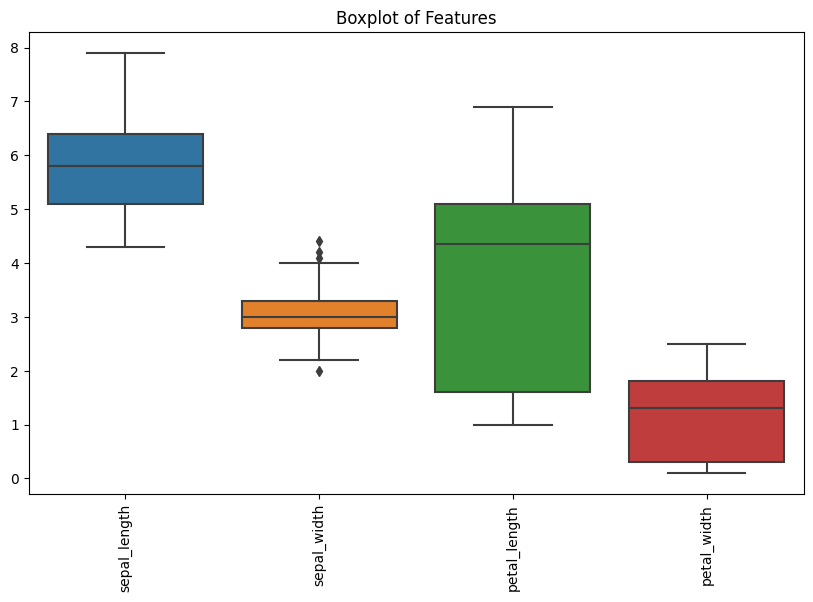

Number of outliers: 4
Outliers transformed.


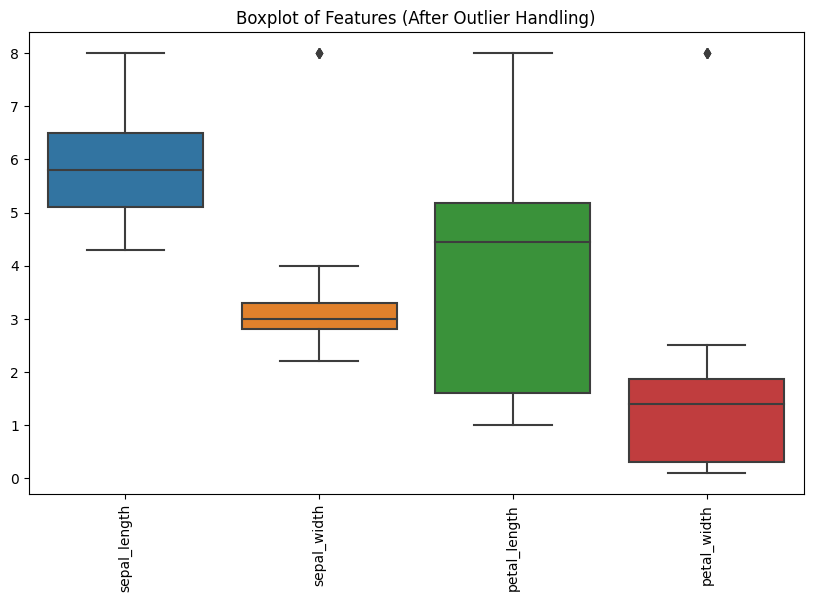

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = iris_data

# Visualize the distribution of each feature using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

# Identify outliers using statistical methods (e.g., Z-score or IQR)
# Z-score method
from scipy.stats import zscore

data = iris_data.drop("class", axis=1)
z_scores = zscore(data)
outlier_threshold = 3  # Adjust the threshold as per your preference
outliers = (abs(z_scores) > outlier_threshold).any(axis=1)

# IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()
print(f"Number of outliers: {num_outliers}")

# Decide whether to remove outliers or transform them
remove_outliers = False

if remove_outliers:
    # Remove outliers from the dataset
    data = data[~outliers]
    print("Outliers removed.")
else:
    # Transform outliers to a specific value
    outlier_value = 8  # Choose an appropriate value for transformation
    data[outliers] = outlier_value
    print("Outliers transformed.")

# Updated visualization after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Features (After Outlier Handling)')
plt.show()

**Influencial datapoint detection using leverage and cooks distance**

In [ ]:
print(iris_data)

In [ ]:
# Separate the target variable (class) from the features
iris_data = pd.read_csv("iris.data", names=cols)

X = iris_data.drop('class', axis=1)
y = iris_data['class']

# Convert the target variable to numeric labels
label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = y.map(label_mapping)


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence





# Add a constant term to the features matrix for the intercept in the linear regression model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Get the influence statistics
influence = OLSInfluence(results)

# Calculate the leverage values
leverage = influence.hat_matrix_diag

# Calculate the Cook's distance
cooks_distance = influence.cooks_distance

# Identify influential data points based on leverage or Cook's distance
influential_points_leverage = leverage > 2 * (X.shape[1] + 1) / X.shape[0]
influential_points_cooks = cooks_distance[0] > 4 / (X.shape[0] - X.shape[1] - 1)

# Print the influential data points
print("Influential points based on leverage:")
print(X[influential_points_leverage])

print("\nInfluential points based on Cook's distance:")
print(X[influential_points_cooks])


**Normality of the set of features using shapiro**

In [ ]:
import pandas as pd
from scipy.stats import shapiro



# Select the features to check for normality
features = X

# Perform Shapiro-Wilk test for each feature
for column in features.columns:
    stat, p_value = shapiro(features[column])
    alpha = 0.05  # Significance level

    print(f"Feature: {column}")
    print(f"Shapiro-Wilk test statistic: {stat}")
    print(f"P-value: {p_value}")

    if p_value > alpha:
        print("Feature appears to be normally distributed.")
    else:
        print("Feature does not appear to be normally distributed.")

    print()


**Data Transformation**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X,y

# Separate the target variable (class) from the features

# Perform normalization using Min-Max scaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Perform standardization using StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X)

**Feature Selection**


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest regressor
rf = RandomForestRegressor()

# Fit the Random Forest model
rf.fit(X, y)

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame of feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance (descending order)
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

**Oversampling techniques using the Synthetic Minority Over-sampling Technique (SMOTE) to balance the imbalanced dataset**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE


# Create a SMOTE object
smote = SMOTE()

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the balanced class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

**Selecting Appropriate Learners for Training and Validation (Random Forest  and Support Vector Machine)**

**Random Forest**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Generate a classification report
classification_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_report)


**Support Vector Machines (SVM)**

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold



# Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier
svm = SVC()

# K-fold cross-validation
kfold = KFold(n_splits=5)
svm_scores_kfold = cross_val_score(svm, X, y, cv=kfold)

# Leave-one-out cross-validation
loo = LeaveOneOut()
svm_scores_loo = cross_val_score(svm, X, y, cv=loo)

# Print the cross-validation scores
print("Support Vector Machines (SVM) - K-fold Cross-validation scores:\n")
print(svm_scores_kfold)

print("\nSupport Vector Machines (SVM) - Leave-one-out Cross-validation scores:\n")
print(svm_scores_loo)

# Fit the classifier on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("\nAccuracy:", accuracy)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)



**Best Model Learner**

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions using the SVM classifier
svm_predictions = svm_classifier.predict(X_test)

# Calculate accuracy for the SVM classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions using the Random Forest classifier
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy for the Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Compare accuracies and select the best model/learner
if svm_accuracy > rf_accuracy:
    best_model = svm_classifier
    best_accuracy = svm_accuracy
    model_name = "SVM"

elif svm_accuracy == rf_accuracy:
    best_model = svm_classifier
    best_accuracy = svm_accuracy
    model_name = "Both are equal"

else:
    best_model = rf_classifier
    best_accuracy = rf_accuracy
    model_name = "Random Forest"

# Print the best model and its accuracy
print("Best Model: ", model_name)
print("Accuracy: ", best_accuracy)


Best Model:  Both are equal
Accuracy:  1.0
